In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import torch

sys.path.append(str(Path.cwd().parent))
from src.data import PlantNetDataLoader, PlantNetPreprocessor

# create preprocessor
preprocessor = PlantNetPreprocessor(
    img_size=224,
    normalize=True,
    augm_strength=0.67
)

# create dataloader
loader = PlantNetDataLoader(
    data_dir='../data/plantnet_300K',
    batch_size=8,
    train_transform=preprocessor.get_full_transform(),
    val_transform=preprocessor.get_interference_transform()
)

train_loader = loader.get_train_loader()
images, labels = next(iter(train_loader))

Loaded 243916 samples, 1081 classes
Loaded 31118 samples, 1081 classes
Loaded 31112 samples, 1081 classes


In [2]:
images.shape

torch.Size([8, 3, 224, 224])

Batch: torch.Size([8, 3, 224, 224])


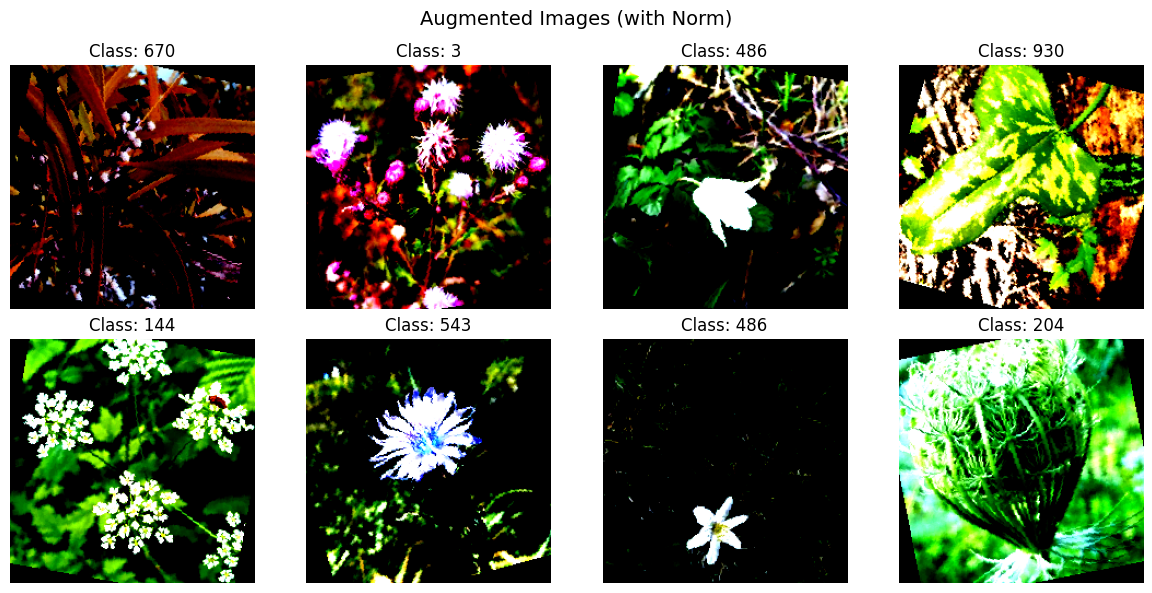

In [ ]:
images, labels = next(iter(loader.get_train_loader()))
print(f"Batch: {images.shape}")

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle("Augmented Images (with normalization)", fontsize=14)

for idx, ax in enumerate(axes.flat):
    img = images[idx].permute(1, 2, 0).numpy().clip(0, 1)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f'Class: {labels[idx].item()}')

plt.tight_layout()
plt.show()

Loaded 243916 samples, 1081 classes
Loaded 31118 samples, 1081 classes
Loaded 31112 samples, 1081 classes
Loaded 243916 samples, 1081 classes
Loaded 31118 samples, 1081 classes
Loaded 31112 samples, 1081 classes
Loaded 243916 samples, 1081 classes
Loaded 31118 samples, 1081 classes
Loaded 31112 samples, 1081 classes
Loaded 243916 samples, 1081 classes
Loaded 31118 samples, 1081 classes
Loaded 31112 samples, 1081 classes
Loaded 243916 samples, 1081 classes
Loaded 31118 samples, 1081 classes
Loaded 31112 samples, 1081 classes


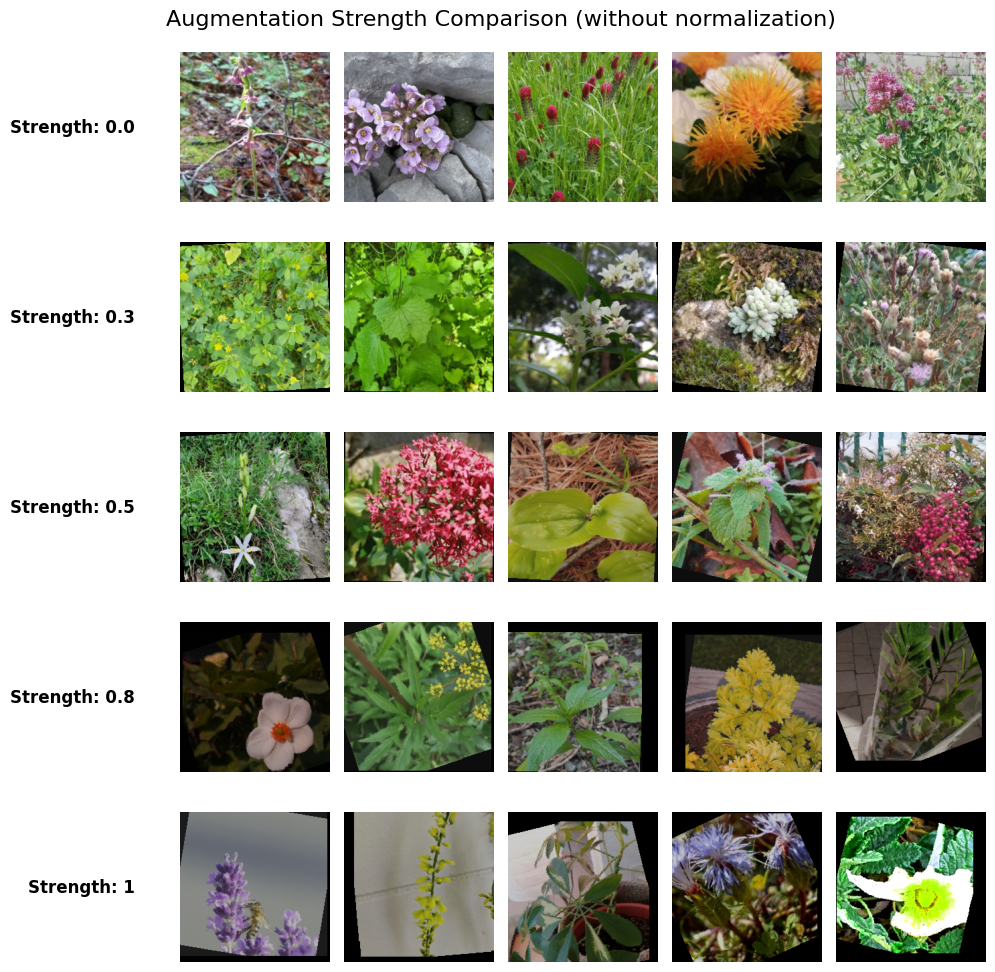

In [5]:
strengths = [0.0, 0.3, 0.5, 0.8, 1]
fig, axes = plt.subplots(len(strengths), 5, figsize=(10, 10))
fig.suptitle('Augmentation Strength Comparison (without normalization)', fontsize=16)

for row, strength in enumerate(strengths):
    # preprocessor - changing the augm_strength
    prep = PlantNetPreprocessor(
        img_size=224,
        normalize=False,
        augm_strength=strength
    )
    
    # according dataloader
    temp_loader = PlantNetDataLoader(
        data_dir='../data/plantnet_300K',
        batch_size=5,
        train_transform=prep.get_full_transform(),
        val_transform=prep.get_interference_transform()
    )
    
    images, labels = next(iter(temp_loader.get_train_loader()))
    
    for col in range(5):
        img = images[col].permute(1, 2, 0).numpy().clip(0, 1)
        axes[row, col].imshow(img)
        axes[row, col].axis('off')
        
        if col == 0:
            axes[row, col].text(
                -0.3, 0.5, 
                f'Strength: {strength}',
                transform=axes[row, col].transAxes,
                fontsize=12,
                weight='bold',
                va='center',
                ha='right'
            )

plt.tight_layout()
plt.show()